Le but de ce projet est d'implémenter un modele de machine learning performant qui a pour but de prédire les weekly sales des magasins de la chaine Walmart

In [1]:
import pandas as pd

In [2]:
features = pd.read_csv('features.csv') #1er dataset

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.shape

(8190, 12)

In [5]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Remplissons les valeurs nulles

In [7]:
features.isnull().mean() * 100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

In [8]:
features["MarkDown1"] = features["MarkDown1"].fillna(0)
features["MarkDown2"] = features["MarkDown2"].fillna(0)
features["MarkDown3"] = features["MarkDown3"].fillna(0)
features["MarkDown4"] = features["MarkDown4"].fillna(0)
features["MarkDown5"] = features["MarkDown5"].fillna(0)

In [9]:
features.isnull().mean() * 100

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.000000
MarkDown2       0.000000
MarkDown3       0.000000
MarkDown4       0.000000
MarkDown5       0.000000
CPI             7.142857
Unemployment    7.142857
IsHoliday       0.000000
dtype: float64

In [10]:
features.fillna(features['CPI'].median(),inplace=True)
features.fillna(features['Unemployment'].median(),inplace=True)

In [11]:
features.isnull().mean() * 100

Store           0.0
Date            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
IsHoliday       0.0
dtype: float64

2eme dataset

In [12]:
stores = pd.read_csv('stores.csv')

In [13]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
stores.shape

(45, 3)

In [15]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


3eme dataset

In [16]:
train = pd.read_csv('train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


On veut travailler sur un seul dataset complet qui reunit les autres

On utilise la fct merge de pandas pour cela

In [17]:
df_train = pd.merge(train,stores,on='Store',how='left')

In [18]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


On met les dates au vrai format

In [19]:
features['Date'] = pd.to_datetime(features['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [20]:
df = pd.merge(df_train,features,on=['Store','Date'],how='left')

In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [22]:
df.shape

(421570, 17)

In [23]:
df.isnull().mean() * 100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday_x     0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
IsHoliday_y     0.0
dtype: float64

In [24]:
df = df.sort_values(by=['Date'])

In [25]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [26]:
df['IsHoliday_x'].isin(df['IsHoliday_y']).all()
# on a 2 colonnes isholiday, on verifie quelles sont identiques pour en supprimer une

True

In [27]:
df = df.drop(['IsHoliday_y'],axis=1)

On transforme les features categorielles en int pour pouvoir les utiliser dans notre modele

In [28]:
df['IsHoliday_x'] = df['IsHoliday_x'].map({True: 1, False: 0})
df['IsHoliday_x'] = df['IsHoliday_x'].astype(int)

In [29]:
df['Type'] = df['Type'].map({'A': 1, 'B': 2, 'C': 3})
df['Type'] = df['Type'].astype(int)

On cree 2 nouvelles features mois et semaine en numero

In [30]:
df['Month']= df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

In [31]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Week
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,5
277665,29,5,2010-02-05,15552.08,0,2,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,5
277808,29,6,2010-02-05,3200.22,0,2,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,5
277951,29,7,2010-02-05,10820.05,0,2,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,5
278094,29,8,2010-02-05,20055.64,0,2,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2,5


In [32]:
df.shape

(421570, 18)

In [33]:
df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Week
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,0.070358,1.589912,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,6.449510,25.826762
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,1.000000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,1.000000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,4.000000,14.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,1.000000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,6.000000,26.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,2.000000,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,9.000000,38.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,3.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,12.000000,52.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,0.666337,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,3.243217,14.151887


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421570 n

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

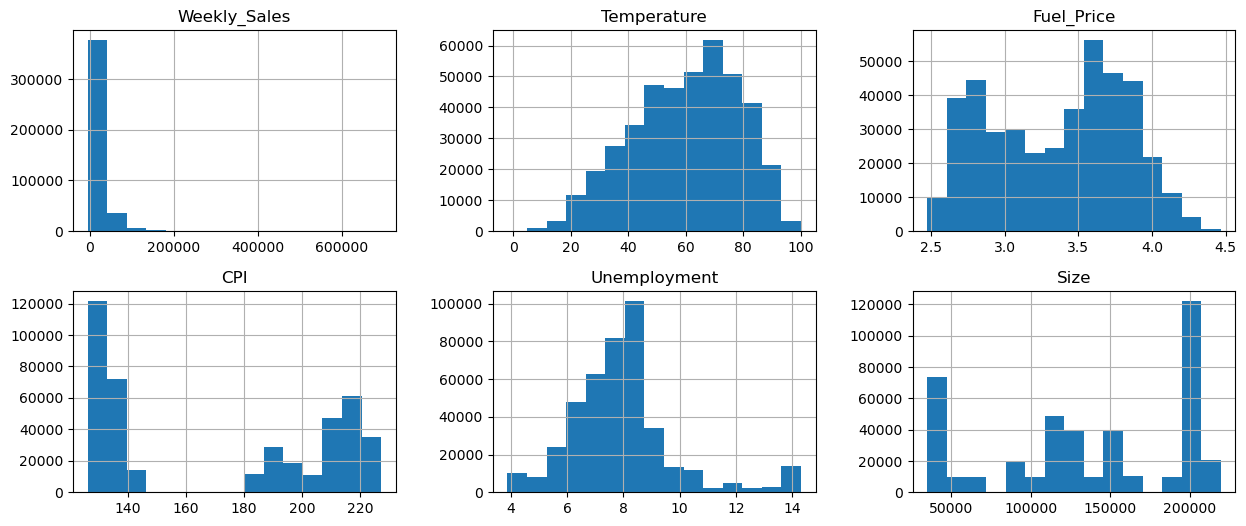

In [36]:
df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

On voit que certaines features doivent etre normalisées

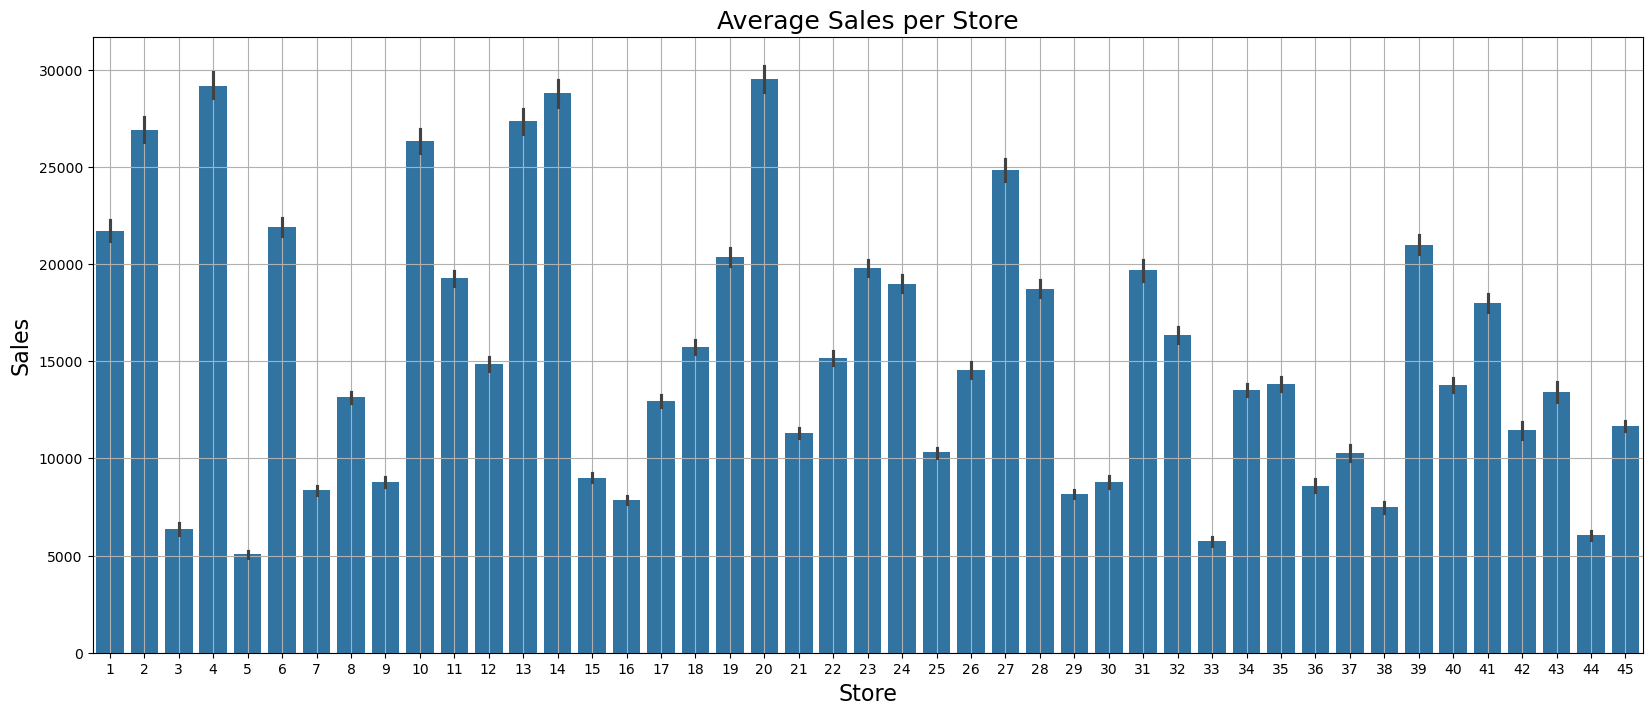

In [37]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

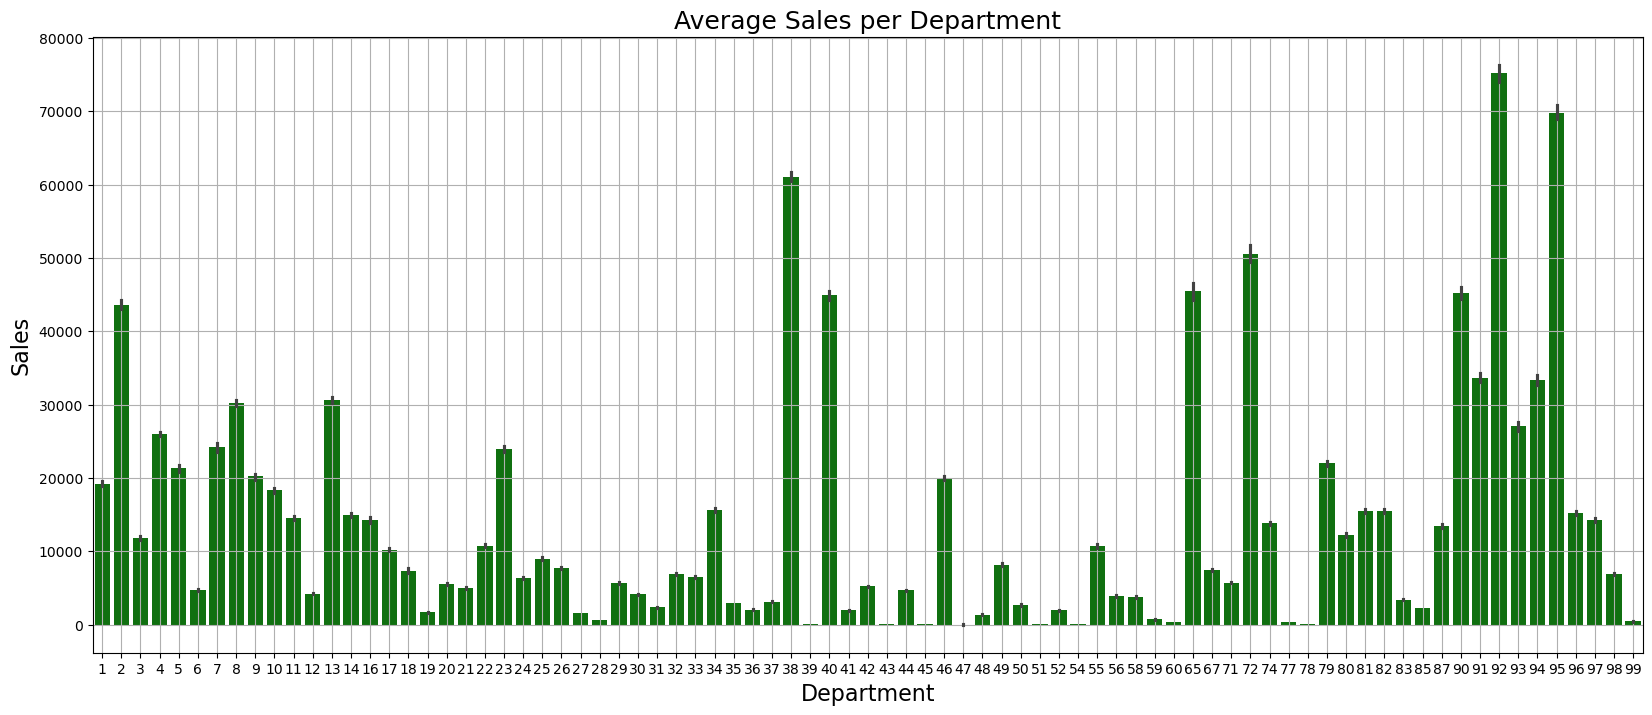

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=df, color='green')
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

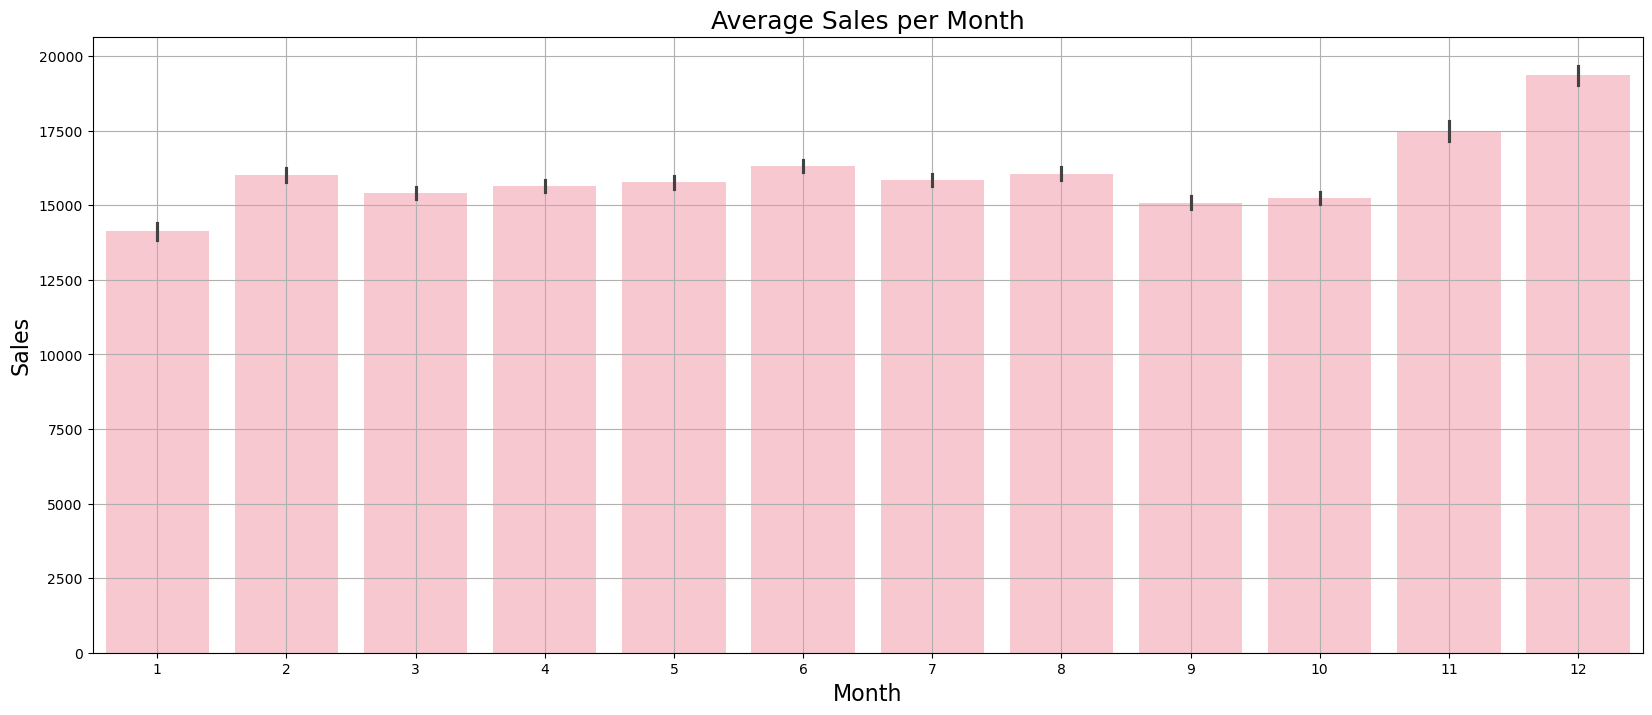

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df, color = 'pink')
plt.grid()
plt.title('Average Sales per Month', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

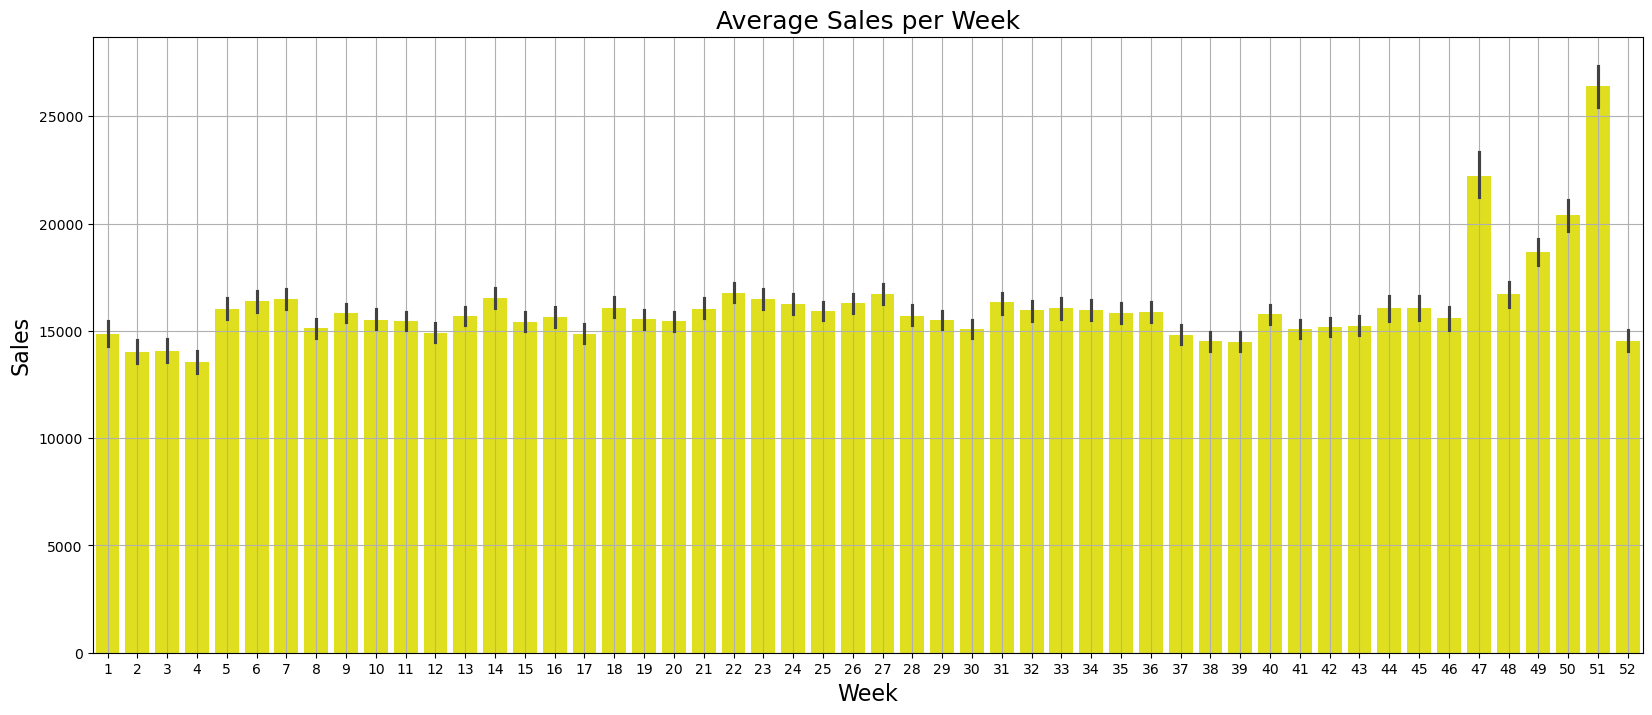

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(x='Week',y='Weekly_Sales',data=df, color = 'yellow')
plt.grid()
plt.title('Average Sales per Week', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

On observe que les ventes augmentent en fin d'année, probablement aux alentours des fêtes de thanksgiving et de noel

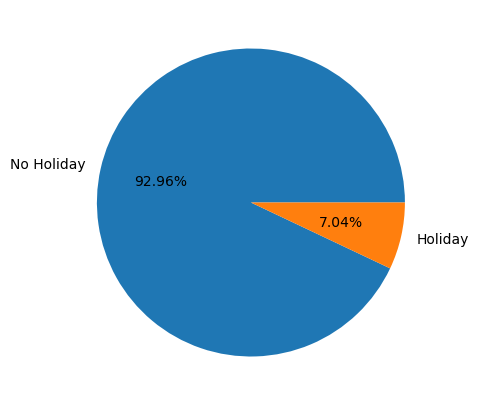

In [41]:
plt.figure(figsize=(5,5))
plt.pie(df['IsHoliday_x'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.show()

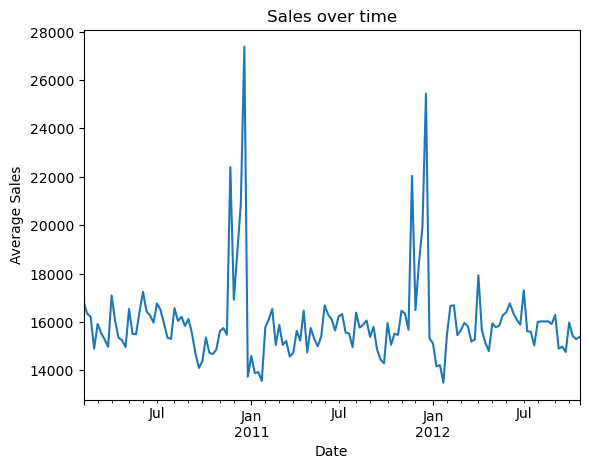

In [42]:
df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Sales over time')
plt.show()

On le voit très bien sur les pics avant janvier

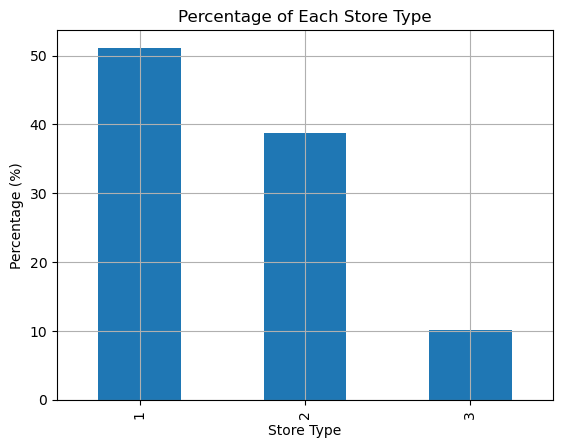

In [43]:
(df['Type'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Percentage of Each Store Type')
plt.xlabel('Store Type')
plt.ylabel('Percentage (%)')
plt.grid()
plt.show()

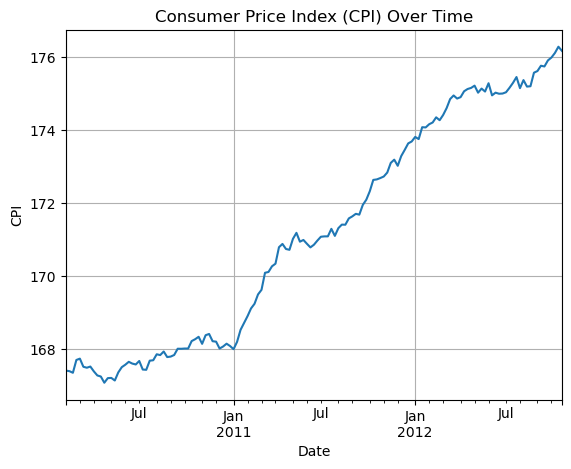

In [44]:
df_grouped_cpi = df.groupby('Date')['CPI'].mean().plot()
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid()
plt.show()

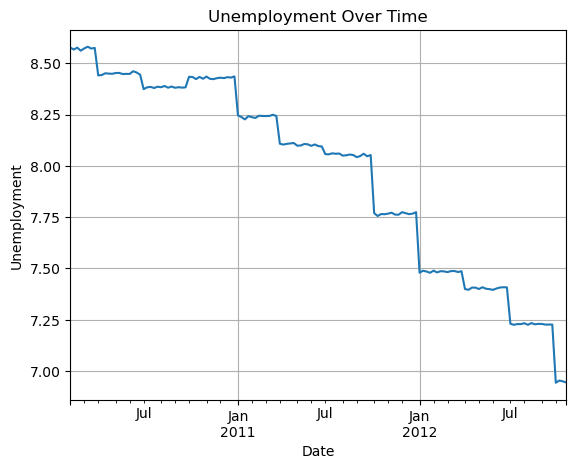

In [45]:
df_grouped_cpi = df.groupby('Date')['Unemployment'].mean().plot()
plt.title('Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.grid()
plt.show()

On observe certaines tendances sur les features, relié notamment à l'économie de marché et à l'inflation

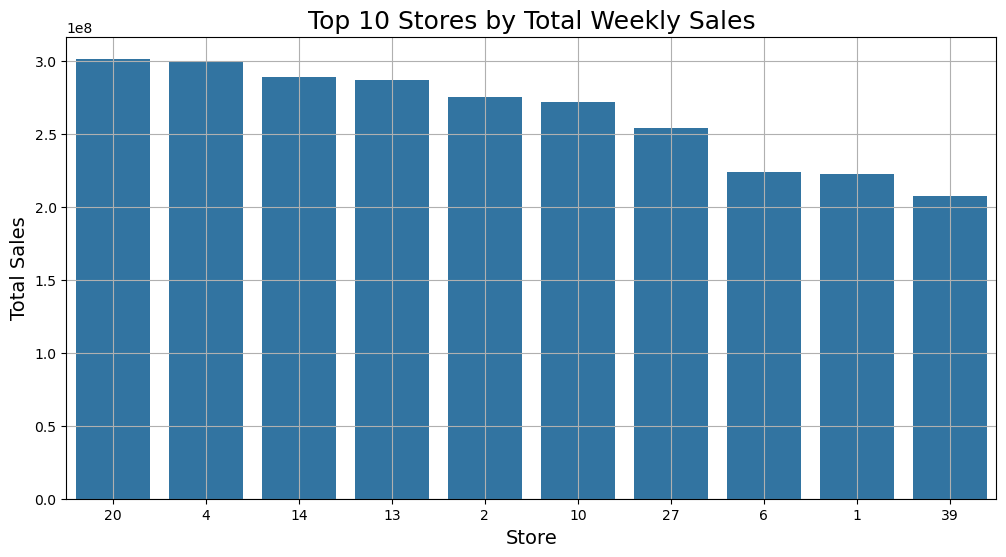

In [46]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_stores, order=top_stores.sort_values('Weekly_Sales', ascending=False)['Store'])
plt.title('Top 10 Stores by Total Weekly Sales', fontsize=18)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()
plt.show()

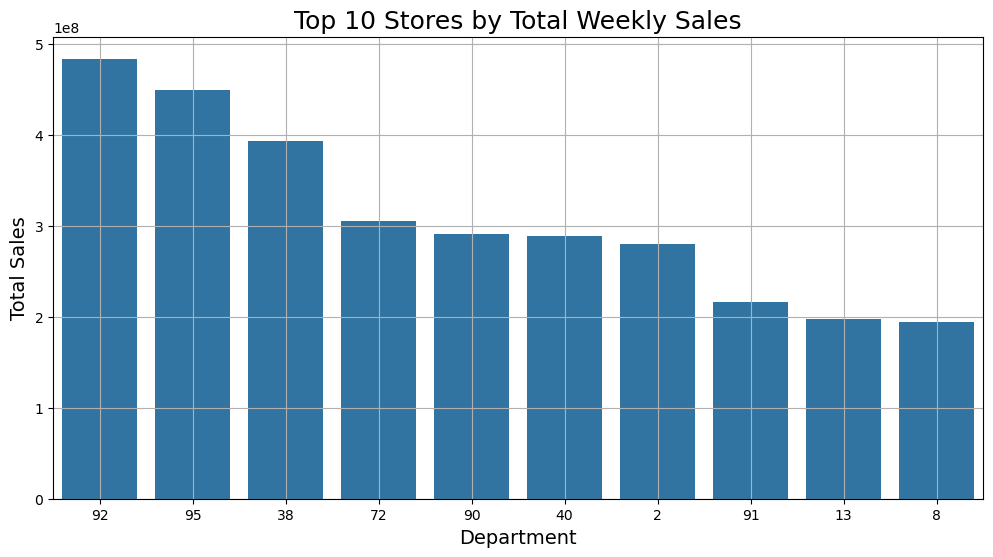

In [47]:
top_stores = df.groupby('Dept')['Weekly_Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=top_stores, order=top_stores.sort_values('Weekly_Sales', ascending=False)['Dept'])
plt.title('Top 10 Stores by Total Weekly Sales', fontsize=18)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()
plt.show()

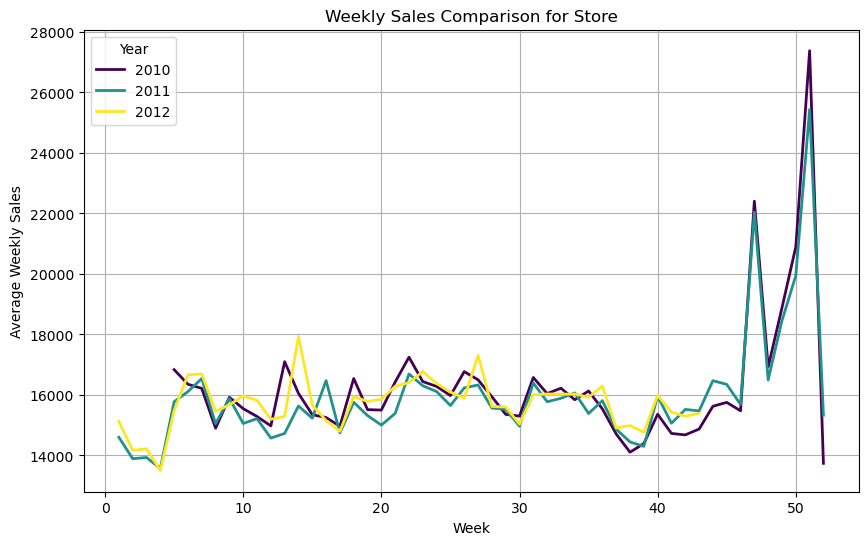

In [48]:
df['Year'] = df['Date'].dt.year
weekly_sales = df.groupby(['Year', 'Week'])['Weekly_Sales'].mean().unstack(level = 0)

plt.figure(figsize=(10, 6))
weekly_sales.plot(linewidth=2, colormap='viridis', ax=plt.gca())
plt.title(f'Weekly Sales Comparison for Store')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year')
plt.grid()
plt.show()

On voit que les ventes suivent globalement la meme tendance année après année

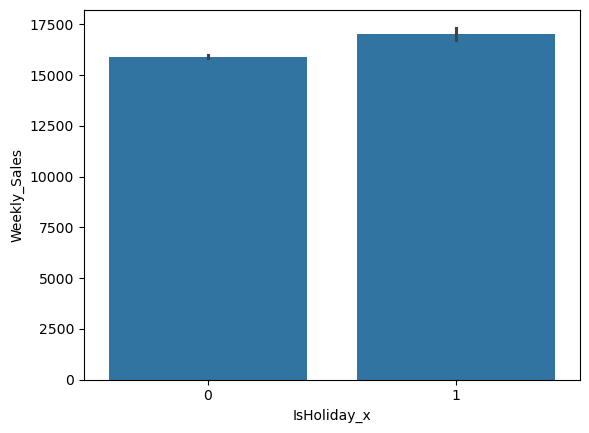

In [49]:
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=df)
plt.show()

On peut donc voir que la moyenne des ventes est plus élevé pendant les vacances.

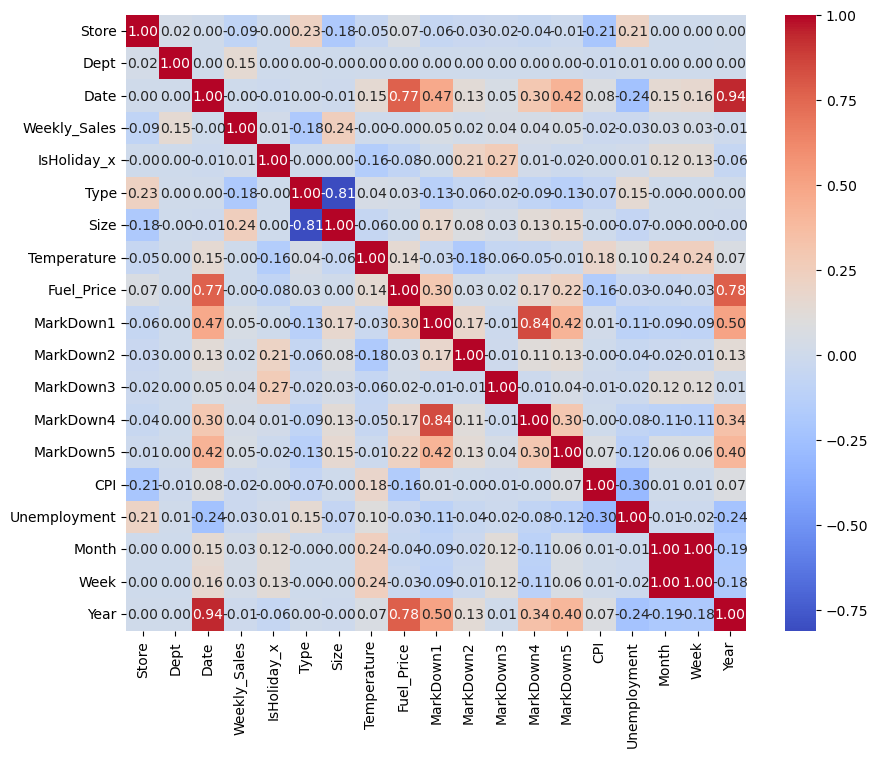

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', fmt=".2f")
plt.show()

On peut voir que la variable ciblée weekly sales est corrélée à certaines features clés : le store, le departement, le type de store et sa taille et les différentes soldes (markdown)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [52]:
X = df.drop(columns=['Weekly_Sales' , 'Date'])
y = df['Weekly_Sales']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

On normalise les differentes donnees pour aider le modèle

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Après avoir split notre dataset en un train et un test, sur un rapport 80/20, on fit le modele de régression linéaire

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

On prédit la variable cible , weekly sales, sur le sous-dataset de test

In [56]:
y_pred = model.predict(X_test)

On compare nos prédictions avec les valeurs réelles, afin d'estimer l'efficacité de notre modèle

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [58]:
print("Erreur quadratique moyenne (MSE) :", mse)
print("Score R^2 :", r2)

Erreur quadratique moyenne (MSE) : 473714565.41197926
Score R^2 : 0.0890117832392342



Les résultats montrent que le modele de régression linéaire a une performance faible. L'erreur quadratique moyenne (MSE) élevee indique que les predictions s'écartent considérablement des valeurs reelles (de 21000 dollar), tandis que le score R2 de 0,089 suggère que le modèle n'explique qu'environ 9 % de la variance des données, ce qui est très faible.

Testons un autre modele : le KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor

On fait pareil, on fit le modele avant de predire la variable cible

On essaye plusieurs nombre de voisins différents pour choisir le meilleur

In [60]:
neighbors_range = [1, 3, 5, 7, 10, 15, 20] #on veut tester plusieurs nombre de voisins

# on stocke les résultats dans une liste pour sortir le meilleur apres
results = []

for n in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_knn)
    r2 = r2_score(y_test, y_pred_knn)

    results.append({'n_neighbors': n, 'MSE': mse, 'R^2': r2})
    print(f"n_neighbors: {n} => MSE: {mse:.2f}, R^2: {r2:.4f}")

n_neighbors: 1 => MSE: 650277652.06, R^2: -0.2505
n_neighbors: 3 => MSE: 398713521.13, R^2: 0.2332
n_neighbors: 5 => MSE: 367968871.78, R^2: 0.2924
n_neighbors: 7 => MSE: 367655194.43, R^2: 0.2930
n_neighbors: 10 => MSE: 367726019.13, R^2: 0.2928
n_neighbors: 15 => MSE: 364881029.49, R^2: 0.2983
n_neighbors: 20 => MSE: 362989572.97, R^2: 0.3019


In [61]:
best_result = min(results, key=lambda x: x['MSE'])
print("\nMeilleur résultat:")
print(f"n_neighbors: {best_result['n_neighbors']} => MSE: {best_result['MSE']:.2f}, R^2: {best_result['R^2']:.4f}")


Meilleur résultat:
n_neighbors: 20 => MSE: 362989572.97, R^2: 0.3019


Bien que le modèle KNN à 20 voisins ait une MSE plus basse et un score R2 meilleur (0,30 vs. 0,089), l'amélioration en termes d'écart moyen des prédictions est relativement modeste, passant de 21 500 dollars à 19 000 dollars. Cela montre que le KNN réduit légèrement l'erreur, mais l'amélioration reste limitée, et les prédictions restent loin des valeurs réelles. Dans le stage 2, nous essaierons des modèles prédictifs plus performants et amelioreront notre pre-processing

STAGE 2

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [64]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
y_pred_rf = rf.predict(X_test)

In [66]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [67]:
print(f"Random Forest => MSE: {mse_rf:.2f}, R^2: {r2_rf:.4f}")


Random Forest => MSE: 13471700.43, R^2: 0.9741


In [68]:
errors = y_test - y_pred_rf
print("Différences (Valeurs réelles - Prédictions) :")
print(errors[:10])

Différences (Valeurs réelles - Prédictions) :
121533    1211.0594
284953   -1209.4264
97563      987.2339
179979   -4306.5805
231185    -280.2123
95230     5057.9972
338959     207.8787
374683    -163.7646
253887     394.7898
44323     -318.9920
Name: Weekly_Sales, dtype: float64


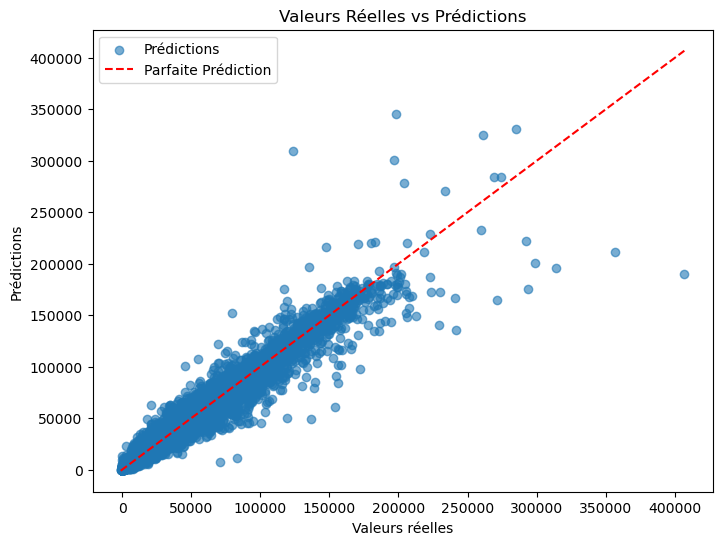

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfaite Prédiction')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs Réelles vs Prédictions")
plt.legend()
plt.show()

In [72]:
from xgboost import XGBRegressor

In [73]:
xgb_regressor = XGBRegressor(
    n_estimators=100,       # Nombre d'arbres
    max_depth=5,            # Profondeur maximale
    learning_rate=0.1,      # Taux d'apprentissage
    random_state=42         # Reproductibilité
)

In [74]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [75]:
y_pred_xgb = xgb_regressor.predict(X_test)

In [76]:
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
print(f"R² (XGBoost): {r2_xgb:.2f}")
print(f"RMSE (XGBoost): {rmse_xgb:.2f}")

R² (XGBoost): 0.87
RMSE (XGBoost): 8200.03


In [78]:
errors = y_test - y_pred_xgb

In [79]:
print("Différences (Valeurs réelles - Prédictions) :")
print(errors[:10])

Différences (Valeurs réelles - Prédictions) :
121533    -556.213906
284953    -669.293281
97563      203.529180
179979   -3601.140430
231185    -722.446953
95230     2183.298047
338959      24.663896
374683     805.503105
253887     253.026836
44323    -5055.934707
Name: Weekly_Sales, dtype: float64


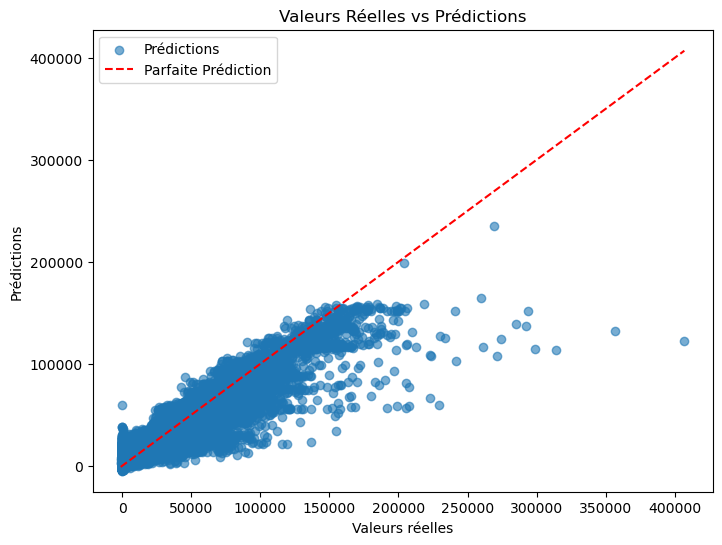

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfaite Prédiction')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs Réelles vs Prédictions")
plt.legend()
plt.show()


In [82]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Week,Year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,5,2010
277665,29,5,2010-02-05,15552.08,0,2,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,2,5,2010
277808,29,6,2010-02-05,3200.22,0,2,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,2,5,2010
277951,29,7,2010-02-05,10820.05,0,2,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,2,5,2010
278094,29,8,2010-02-05,20055.64,0,2,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,2,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,24638.96,0,1,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,10,43,2012
181170,19,30,2012-10-26,3740.12,0,1,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,10,43,2012
181313,19,31,2012-10-26,3128.17,0,1,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,10,43,2012
181599,19,33,2012-10-26,5740.14,0,1,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,10,43,2012


Maintenant nous avons donc pu voir que le modèle de random forest nous semble vraiment mieux adapté avec des scores assez impressionnants 

In [83]:
df['Date'] = pd.to_datetime(df['Date'])
sales_time_series = df.groupby('Date')['Weekly_Sales'].sum()

<Axes: title={'center': 'Ventes hebdomadaires Walmart'}, xlabel='Date'>

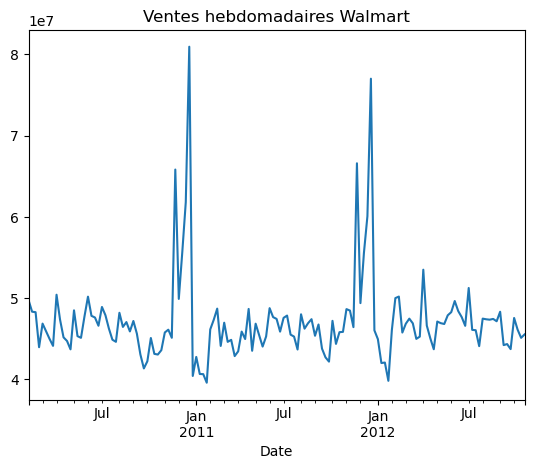

In [84]:
sales_time_series.plot(title="Ventes hebdomadaires Walmart")

In [85]:
from statsmodels.tsa.stattools import adfuller

In [133]:
train_size = int(len(sales_time_series) * 0.8)
train, test = sales_time_series[:train_size], sales_time_series[train_size:]

In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [134]:
model = ARIMA(train, order=(5, 1, 0))  # Ajuster (p, d, q) selon les données
arima_model = model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [135]:
forecast = arima_model.forecast(steps=len(test))
test_index = test.index
predictions = pd.Series(forecast, index=test_index)

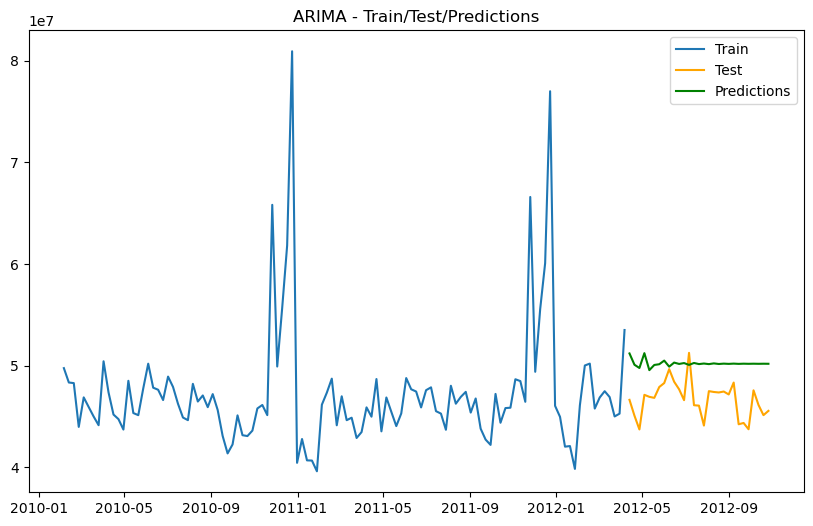

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(predictions.index, predictions, label='Predictions', color='green')
plt.title('ARIMA - Train/Test/Predictions')
plt.legend()
plt.show()

Le modèle ARIMA ne semble pas du tout adapté.
ARIMA est un modèle classique de séries temporelles qui est efficace pour capturer des relations linéaires dans des données univariées. Il est bien adapté pour prédire des séries sans composantes saisonnières significatives. Nous l’avons testé pour fournir une base solide et une comparaison avec d’autres modèles plus complexes.

En quoi consiste-t-il ?
	•	Autoregressive (AR) : Modélise la dépendance entre une valeur et ses précédentes.
	•	Integrated (I) : Différencie les données pour rendre la série stationnaire (suppression de tendance).
	•	Moving Average (MA) : Modélise les relations entre les erreurs passées de prédiction.
    
	ARIMA est défini par trois paramètres principaux :  (p, d, q) , où :
	•	 p  : Ordre de la partie AR.
	•	 d  : Degré de différenciation pour stationnariser la série.
	•	 q  : Ordre de la partie MA.

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [100]:
df['Date'] = pd.to_datetime(df['Date'])
sales_time_series = df.groupby('Date')['Weekly_Sales'].sum()

In [103]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sales_time_series.values.reshape(-1, 1))

In [104]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [105]:
seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

In [106]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [107]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
model.compile(optimizer='adam', loss='mse')

In [128]:
model.fit(X_train, y_train, epochs=5000, batch_size=32, verbose=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1272e-05 
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3848e-05 
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8293e-05
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6140e-05 
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0360e-05
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6374e-05
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8318e-05
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3686e-05
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5445e-05
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4457e-05
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3194e-05
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0547e-05
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4185e-05
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5488e-05
Epoch 15/5000
4/4 ━━━━━━━━

In [129]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Remettre les prédictions à l'échelle d'origine
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


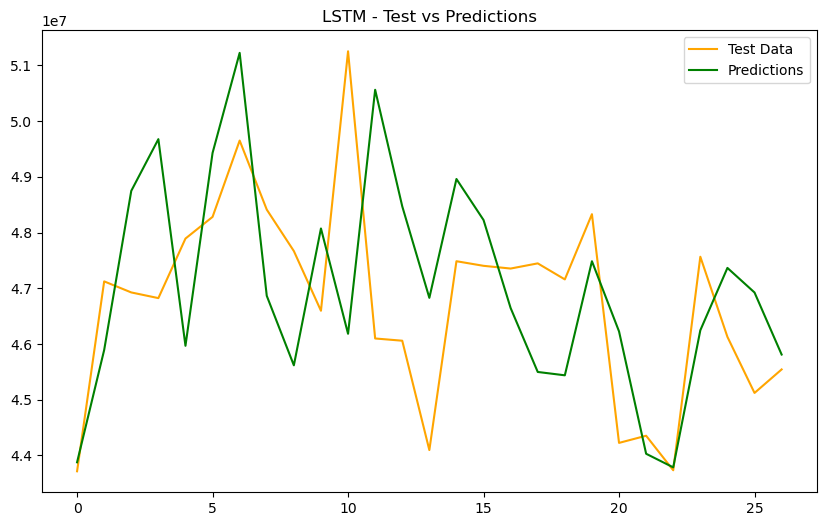

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Test Data', color='orange')
plt.plot(range(len(predictions)), predictions, label='Predictions', color='green')
plt.title('LSTM - Test vs Predictions')
plt.legend()
plt.show()

Ce modèle LSTM semble bien mieux adpaté cependant il manque des données pour que le modèle capte parfaitement les tendances.
Les modèles LSTM sont des réseaux neuronaux récurrents (RNN) spécialement conçus pour gérer les dépendances à long terme dans les séries temporelles. Ils sont idéaux pour capturer des relations non linéaires complexes entre les données, ce qui les rend adaptés à des scénarios où des variables exogènes ou des interactions subtiles influencent les ventes.

En quoi consiste-t-il ?
	•	LSTM utilise des cellules avec des mécanismes de “portes” pour mémoriser ou oublier des informations au fil du temps, ce qui le distingue des RNN classiques.
	•	Fonctionne bien avec des données séquentielles, permettant de modéliser à la fois les tendances à court et long terme.
	•	Les entrées sont sous forme de séquences (par exemple, les 10 dernières semaines) et le modèle prédit la valeur suivante.
	•	LSTM nécessite souvent une normalisation des données pour améliorer la convergence pendant l’entraînement.


In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [139]:
train_size = int(len(sales_time_series) * 0.8)
train, test = sales_time_series[:train_size], sales_time_series[train_size:]

In [140]:
model = SARIMAX(train, 
                order=(1, 1, 1),  # (p, d, q)
                seasonal_order=(1, 1, 1, 52))  # (P, D, Q, s) avec s = périodicité saisonnière
sarima_model = model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00561D+01    |proj g|=  5.32878D+00

At iterate    5    f=  8.55628D+00    |proj g|=  1.61472D-01

At iterate   10    f=  8.54568D+00    |proj g|=  9.01100D-02

At iterate   15    f=  8.52023D+00    |proj g|=  3.17515D-02

At iterate   20    f=  8.51721D+00    |proj g|=  2.42759D-03

At iterate   25    f=  8.51691D+00    |proj g|=  6.42481D-04

At iterate   30    f=  8.51690D+00    |proj g|=  1.16565D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [141]:
forecast = sarima_model.forecast(steps=len(test))
test_index = test.index
predictions = pd.Series(forecast, index=test_index)

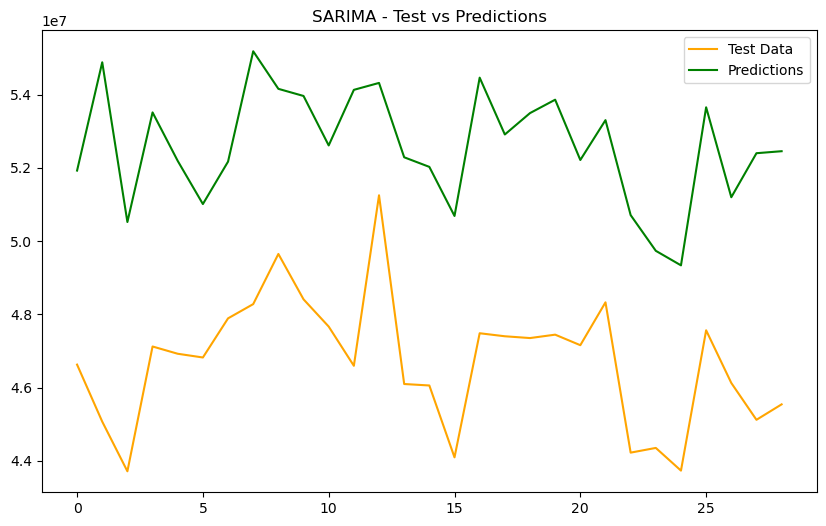

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(test)), test, label='Test Data', color='orange')
plt.plot(range(len(predictions)), predictions, label='Predictions', color='green')
plt.title('SARIMA - Test vs Predictions')
plt.legend()
plt.show()

SARIMA est une extension d’ARIMA qui prend en compte les motifs saisonniers dans les séries temporelles, comme les fluctuations hebdomadaires, mensuelles ou annuelles. Étant donné que les ventes hebdomadaires peuvent présenter une forte saisonnalité (par exemple, des pics en période de fêtes), ce modèle est particulièrement pertinent.

En quoi consiste-t-il ?
	•	SARIMA ajoute des composantes saisonnières à ARIMA, avec des paramètres supplémentaires :  (P, D, Q, s) , où :
	•	 P  : Ordre de la partie AR saisonnière.
	•	 D  : Différenciation saisonnière.
	•	 Q  : Ordre de la partie MA saisonnière.
	•	 s  : Périodicité saisonnière (par exemple,  s = 52  pour des données hebdomadaires).

SARIMA est particulièrement utile pour prédire les valeurs futures en tenant compte des motifs répétitifs dans les données. Dans notre cas il ne semble pas bien fonctionner

In [144]:
from prophet import Prophet

In [145]:
df['Date'] = pd.to_datetime(df['Date'])
sales_time_series = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_time_series.columns = ['ds', 'y']

In [146]:
train_size = int(len(sales_time_series) * 0.8)
train = sales_time_series[:train_size]
test = sales_time_series[train_size:]

In [147]:
prophet_model = Prophet()
prophet_model.fit(train)

13:47:29 - cmdstanpy - INFO - Chain [1] start processing
13:47:29 - cmdstanpy - INFO - Chain [1] done processing


In [148]:
future = prophet_model.make_future_dataframe(periods=len(test), freq='W')  # freq='W' pour les données hebdomadaires
forecast = prophet_model.predict(future)

In [149]:
predictions = forecast.iloc[-len(test):]['yhat'].values

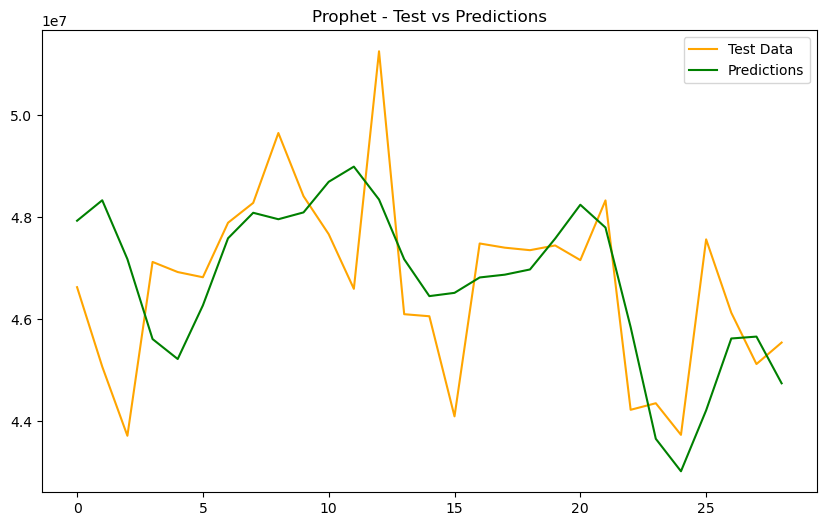

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(test)), test['y'].values, label='Test Data', color='orange')
plt.plot(range(len(predictions)), predictions, label='Predictions', color='green')
plt.title('Prophet - Test vs Predictions')
plt.legend()
plt.show()

Prophet est conçu pour des séries temporelles comportant des tendances, des saisonnalités et des événements exceptionnels (comme les jours fériés). Il est simple à configurer et capable de gérer des séries avec des données manquantes ou irrégulières. Son approche intuitive et flexible en fait un outil puissant pour les données business.

En quoi consiste-t-il ?
	•	Tendance : Modélise la croissance linéaire ou logistique des données.
	•	Saisonnalité : Capture les motifs périodiques (par exemple, hebdomadaires ou annuels).
	•	Événements : Permet de spécifier des dates importantes (jours fériés, promotions).
	•	Prophet décompose les séries temporelles en trois composantes principales : tendance, saisonnalité, et erreurs.
	•	Contrairement à ARIMA ou SARIMA, Prophet est particulièrement robuste face aux variations ou aux anomalies dans les données.